In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Set to display all columns
pd.set_option('display.max_columns', None)

# Set to display 50 rows 
pd.set_option('display.max_rows', 50)

# Importing the movie dataset
movie = pd.read_csv('../data/Original_CMU/movie.metadata.tsv', sep= '\t', header=None)
movie.columns = ['WikiID', 'FreebaseID', 'Name', 'ReleaseDate',
                     'Revenue', 'Runtime', 'Languages_tuple', 'Countries_tuples', 'Genres_tuples']
movie.head()

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [2]:
print(movie.shape)
print(movie.dtypes)

(81741, 9)
WikiID                int64
FreebaseID           object
Name                 object
ReleaseDate          object
Revenue             float64
Runtime             float64
Languages_tuple      object
Countries_tuples     object
Genres_tuples        object
dtype: object


# Checking missing values in the movie dataset

In [3]:
print((pd.isna(movie.iloc[:,:6]).sum()) / len(movie))
print((movie.iloc[:, 6:] == '{}').sum() / len(movie))

WikiID         0.000000
FreebaseID     0.000000
Name           0.000000
ReleaseDate    0.084437
Revenue        0.897224
Runtime        0.250180
dtype: float64
Languages_tuple     0.169633
Countries_tuples    0.099754
Genres_tuples       0.028064
dtype: float64


# Data Processing

## Parsing tuples into lists

In [4]:
import ast

def conv_to_dict(val): 
    try:
        return ast.literal_eval(val) if pd.notna(val) else {}
    except (ValueError, SyntaxError):
        return {}

def get_list(x):
    return list(x.values())

In [5]:
movie['Languages'] = movie['Languages_tuple'].apply(conv_to_dict).apply(get_list)
movie['Countries'] = movie['Countries_tuples'].apply(conv_to_dict).apply(get_list)
movie['Genres'] = movie['Genres_tuples'].apply(conv_to_dict).apply(get_list)

In [6]:
movie.head()

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",[German Language],[Germany],[Drama]


## Importing the movie summary plot dataset

In [7]:
plots = pd.read_csv('../data/Original_CMU/plot_summaries.txt', sep='\t', header=None)
plots.columns = ['WikiID', 'Plot']
plots.head()

,WikiID,Plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


## Importing the character dataset

In [8]:
characters = pd.read_csv('../data/Original_CMU/character.metadata.tsv', sep= '\t', header=None)
characters.columns = ['WikiMovieID', 'FreebaseMovieID', 'MovieReleaseDate','CharacterName',
                      'ActorBirthDate', 'ActorGender', 'ActorHeight','ActorEthnicity', 
                      'ActorName', 'ActorAge', 'CharacterActorMap', 'CharacterID', 'ActorID']
characters.head()

,WikiMovieID,FreebaseMovieID,MovieReleaseDate,CharacterName,ActorBirthDate,ActorGender,ActorHeight,ActorEthnicity,ActorName,ActorAge,CharacterActorMap,CharacterID,ActorID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


### Checking missing values of the character dataset

In [9]:
pd.isna(characters).sum() / len(characters)

WikiMovieID          0.000000
FreebaseMovieID      0.000000
MovieReleaseDate     0.022178
CharacterName        0.572205
ActorBirthDate       0.235528
ActorGender          0.101203
ActorHeight          0.656457
ActorEthnicity       0.764665
ActorName            0.002725
ActorAge             0.350841
CharacterActorMap    0.000000
CharacterID          0.572183
ActorID              0.001808
dtype: float64

## Merging the movie and the summary plot datasets

In [10]:
movie_plot = movie.merge(plots, on='WikiID', how='left')
movie_plot.head()

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres,Plot
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",[Norwegian Language],[Norway],"[Crime Fiction, Drama]",NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",[German Language],[Germany],[Drama],"Eva, an upper class housewife, becomes frustra..."


### Extracting only release year from release date as there are a lot of entries with just years

In [11]:
movie_plot['merge_year'] = movie_plot['ReleaseDate'].apply(lambda x: x.split('-')[0] if pd.notna(x) else None).astype('Int64')

# EDA on the merged dataset

## How many languages, genres, and countries are there?

In [12]:
def count_unique(df, column_name):
    return df[column_name].explode().nunique()

unique_languages = count_unique(movie_plot, 'Languages')
unique_genres = count_unique(movie_plot, 'Genres')
unique_countries = count_unique(movie_plot, 'Countries')

print("Number of unique languages:", unique_languages)
print("Number of unique genres:", unique_genres)
print("Number of unique countries:", unique_countries)

Number of unique languages: 207
Number of unique genres: 363
Number of unique countries: 147


## Distribution of release year of movies?

<Axes: xlabel='merge_year', ylabel='Count'>

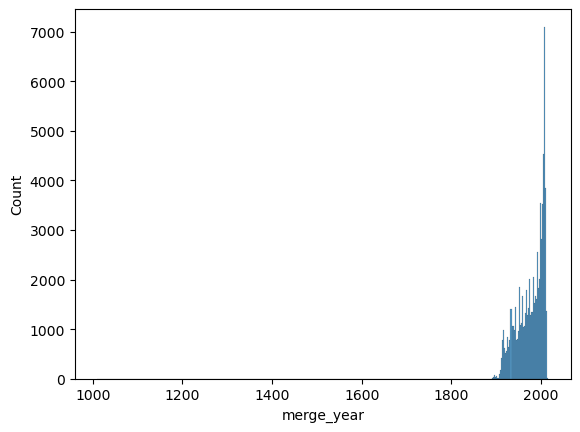

In [13]:
sns.histplot(x='merge_year', data=movie_plot)

### There seems to be an outlier somewhere...

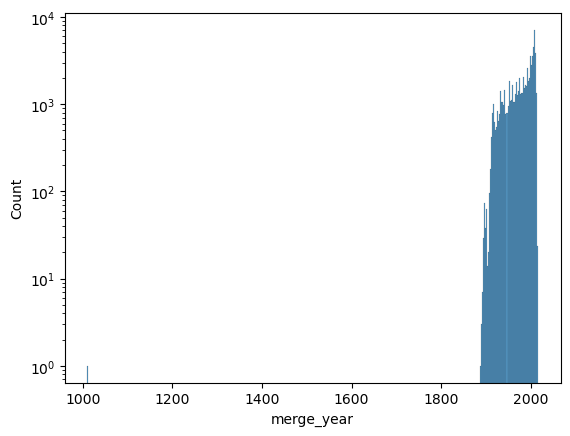

In [14]:
hist = sns.histplot(x='merge_year', data=movie_plot)
hist.set_yscale('log')

In [15]:
movie_plot['merge_year'].min()

np.int64(1010)

### Movie released in 1010 seems weird...

In [16]:
movie_plot[movie_plot['merge_year'] == 1010]

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres,Plot,merge_year
62836,29666067,/m/0fphzrf,Hunting Season,1010-12-02,12160978.0,140.0,"{""/m/02hwyss"": ""Turkish Language"", ""/m/02h40lc...","{""/m/01znc_"": ""Turkey""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/02n4kr"": ""My...","[Turkish Language, English Language]",[Turkey],"[Crime Fiction, Mystery, Drama, Thriller]",Veteran homicide cop Ferman and his hot-heade...,1010


### Hunting Season is a movie released in 2010, so must be a typo!

In [17]:
movie_plot.loc[movie_plot['merge_year'] == 1010, 'merge_year'] = 2010
movie_plot.loc[movie_plot['ReleaseDate'] == '1010-12-02', 'ReleaseDate'] = '2010-12-02'
movie_plot[movie_plot['Name'] == 'Hunting Season']

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres,Plot,merge_year
62836,29666067,/m/0fphzrf,Hunting Season,2010-12-02,12160978.0,140.0,"{""/m/02hwyss"": ""Turkish Language"", ""/m/02h40lc...","{""/m/01znc_"": ""Turkey""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/02n4kr"": ""My...","[Turkish Language, English Language]",[Turkey],"[Crime Fiction, Mystery, Drama, Thriller]",Veteran homicide cop Ferman and his hot-heade...,2010


In [18]:
movie_languages_expanded = movie_plot.explode('Languages').reset_index()
top_languages = movie_languages_expanded['Languages'].value_counts().nlargest(10).index
movie_languages_expanded['Languages'] = movie_languages_expanded['Languages'].apply(lambda x: x if x in top_languages else 'Other')

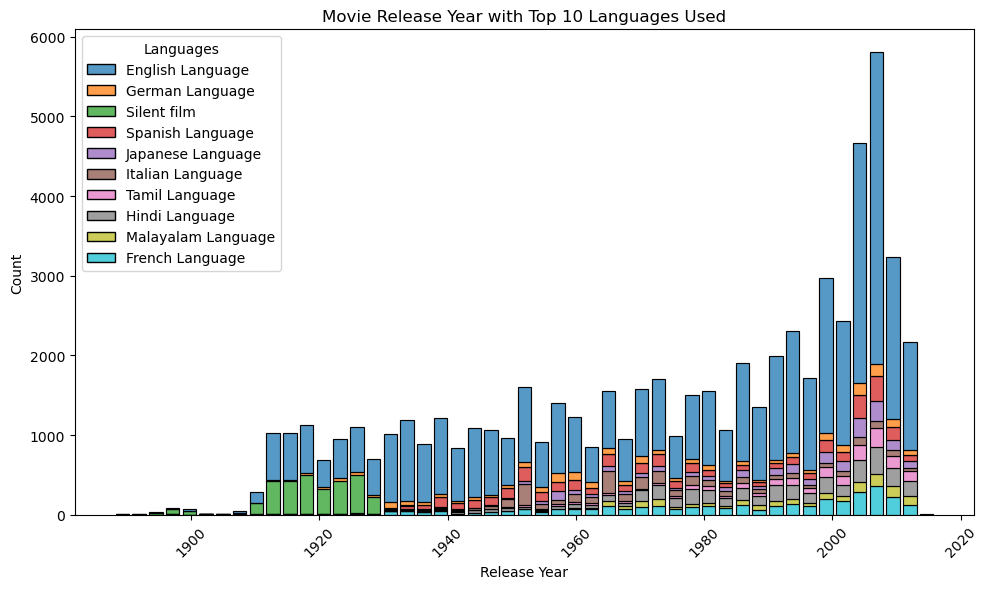

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=movie_languages_expanded[movie_languages_expanded['Languages'] != 'Other'], x='merge_year', hue='Languages', multiple='stack', shrink=0.8)

handles, labels = plt.gca().get_legend_handles_labels()

plt.title('Movie Release Year with Top 10 Languages Used')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
movie_genres_expanded = movie_plot.explode('Genres').reset_index()
movie_genres_expanded.shape

(245623, 15)

In [21]:
top_genres = movie_genres_expanded['Genres'].value_counts().nlargest(10).index
movie_genres_expanded['Genres'] = movie_genres_expanded['Genres'].apply(lambda x: x if x in top_genres else 'Other')

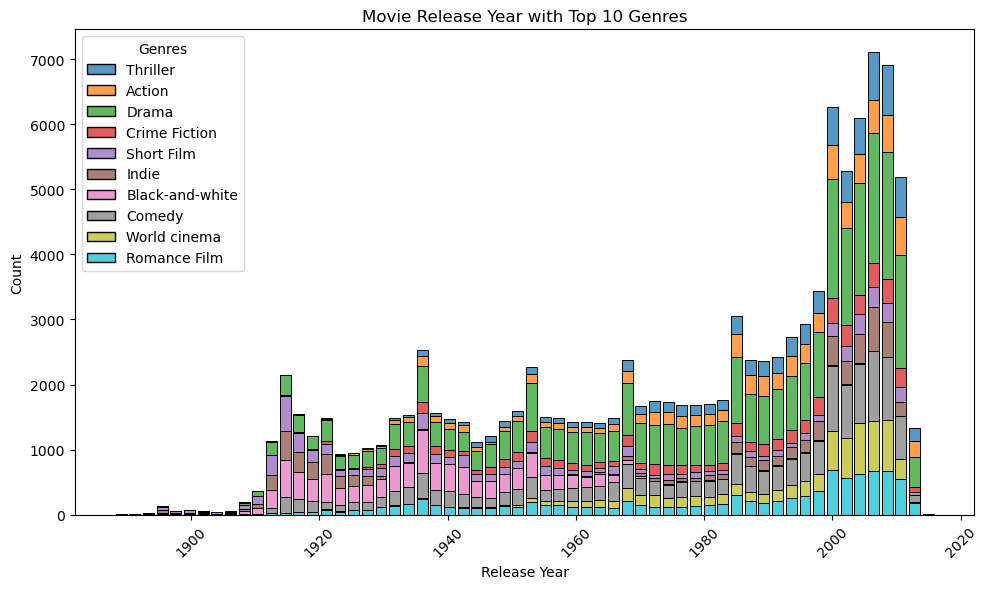

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=movie_genres_expanded[movie_genres_expanded['Genres'] != 'Other'], x='merge_year', hue='Genres', multiple='stack', shrink=0.8)

handles, labels = plt.gca().get_legend_handles_labels()

plt.title('Movie Release Year with Top 10 Genres')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
movie_countries_expanded = movie_plot.explode('Countries').reset_index()
movie_countries_expanded.shape

(94593, 15)

In [24]:
top_countries = movie_countries_expanded['Countries'].value_counts().nlargest(10).index
movie_countries_expanded['Countries'] = movie_countries_expanded['Countries'].apply(lambda x: x if x in top_countries else 'Other')

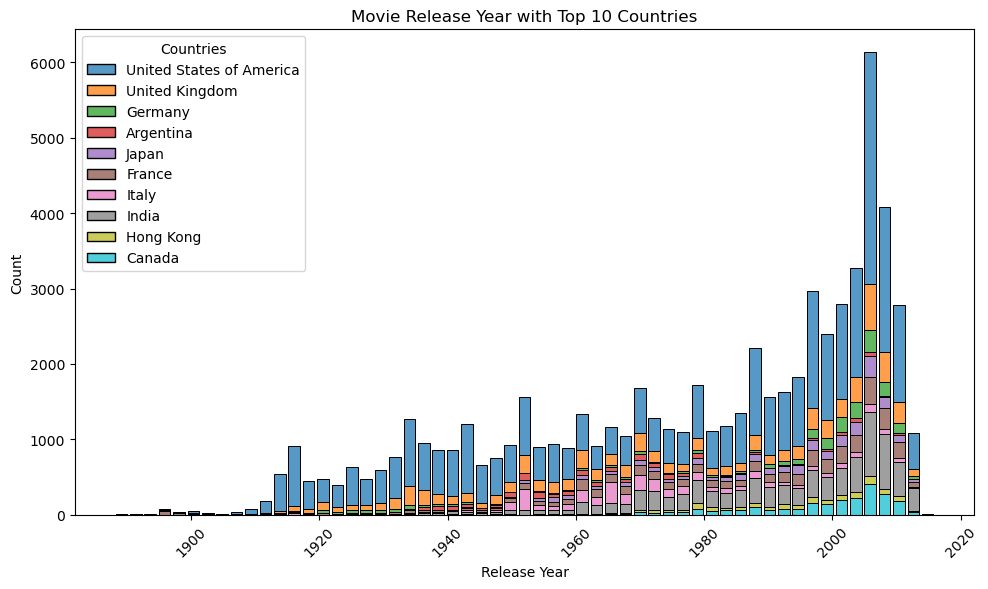

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data=movie_countries_expanded[movie_countries_expanded['Countries'] != 'Other'], x='merge_year', hue='Countries', multiple='stack', shrink=0.8)

handles, labels = plt.gca().get_legend_handles_labels()

plt.title('Movie Release Year with Top 10 Countries')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Merging character dataset with movie_plot dataset

In [26]:
def to_list(series):
    return series.tolist()

In [27]:
characters_grouped = characters.groupby('WikiMovieID').agg({
    'CharacterName': to_list,
    'CharacterID': to_list,
    'CharacterActorMap': to_list,
    'ActorID': to_list,
    'ActorName': to_list,
    'ActorAge': to_list,
    'ActorGender': to_list,
    'ActorBirthDate': to_list,
    'ActorHeight': to_list,
})

In [28]:
# Now we can merge the character_instances with the movie_plot dataset
movie_plot_char = movie_plot.merge(characters_grouped, left_on = 'WikiID', right_on = 'WikiMovieID', how='left')
print(movie_plot_char.shape)

(81741, 23)


In [29]:
movie_plot_char.head()

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres,Plot,merge_year,CharacterName,CharacterID,CharacterActorMap,ActorID,ActorName,ActorAge,ActorGender,ActorBirthDate,ActorHeight
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th...",2001,"[Akooshay, Lieutenant Melanie Ballard, Desolat...","[/m/0bgcj3x, /m/0bgchn4, /m/0bgchn_, /m/0bgchn...","[/m/0bgchxw, /m/0jys3m, /m/0jys3g, /m/02vchl6,...","[/m/03wcfv7, /m/0346l4, /m/01vw26l, /m/034hyc,...","[Wanda De Jesus, Natasha Henstridge, Ice Cube,...","[42.0, 27.0, 32.0, 33.0, 23.0, 52.0, 56.0, nan...","[F, F, M, M, F, F, F, M, M, M, M, M, M, M, M, ...","[1958-08-26, 1974-08-15, 1969-06-15, 1967-09-1...","[1.62, 1.78, 1.727, 1.75, 1.65, 1.727, 1.753, ..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",NaN,2000,"[Police Officer, Reporter, nan, nan, FBI Profi...","[/m/0lr3z80, /m/0lr3z8g, nan, nan, /m/0lr3z93,...","[/m/0lr37fl, /m/0lr37d8, /m/0lr37gd, /m/0lr37f...","[/m/0h8pnlw, /m/034dbm, /m/0lr37gh, /m/0gc9cpb...","[Allen Cutler, Alice Barrett, Rod Britt, Hildy...","[nan, 43.0, nan, nan, 50.0, 55.0, 40.0, 35.0, ...","[M, F, M, F, M, M, M, F, F, M, M, M, M, M, M]","[nan, 1956-12-19, nan, nan, 1950-01-05, 1945-0...","[nan, nan, nan, nan, nan, 1.85, nan, 1.63, nan..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",[Norwegian Language],[Norway],"[Crime Fiction, Drama]",NaN,1988,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[/m/0gct1bn, /m/0gct1bv, /m/0gct1c5, /m/0gct1cb]","[/m/053j7xf, /m/0gct1by, /m/0bwh7d8, /m/04ghdvq]","[Frank Krog, Kristin Kajander, Vidar Sandem, A...","[33.0, 28.0, 40.0, 30.0]","[M, F, M, F]","[1954-10-05, 1959-02-28, 1947, 1957-02-04]","[nan, nan, nan, nan]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...,1987,"[nan, nan]","[nan, nan]","[/m/02t9_0c, /m/02vct27]","[/m/036496, /m/07g60h]","[David Keith, Cathy Moriarty]","[32.0, 26.0]","[M, F]","[1954-05-08, 1960-11-29]","[1.83, 1.75]"
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",[German Language],[Germany],[Drama],"Eva, an upper class housewife, becomes frustra...",1983,"[nan, nan, nan]","[nan, nan, nan]","[/m/02vb3cv, /m/02tbd9f, /m/02vdfng]","[/m/09d6hv, /m/06prxs, /m/09k3x_]","[Gudrun Landgrebe, Mathieu Carrière, Hanns Zis...","[32.0, 32.0, 35.0]","[F, M, M]","[1950-06-20, 1950-08-02, 1947-06-18]","[nan, nan, nan]"


## Loading external ratings dataset

In [30]:
ratings = pd.read_csv('../data/Movie_Ratings/ratings.csv')
ratings.shape

(20000263, 4)

In [31]:
m_ratings = pd.read_csv('../data/Movie_Ratings/movies.csv')
m_ratings.shape

(27278, 3)

In [32]:
grouped_ratings = ratings.groupby('movieId')['rating'].agg(
    mean_ratings = 'mean',
    std_dev_ratings = 'std',
    count_ratings = 'count'
).reset_index()
grouped_ratings.shape

(26744, 4)

In [33]:
name_ratings = m_ratings.iloc[:,:2].merge(grouped_ratings, on='movieId', how='left')
name_ratings.head()

,movieId,title,mean_ratings,std_dev_ratings,count_ratings
0,1,Toy Story (1995),3.921240,0.889012,49695.0
1,2,Jumanji (1995),3.211977,0.951150,22243.0
2,3,Grumpier Old Men (1995),3.151040,1.006642,12735.0
3,4,Waiting to Exhale (1995),2.861393,1.095702,2756.0
4,5,Father of the Bride Part II (1995),3.064592,0.982140,12161.0


In [34]:
name_ratings['merge_title'] = name_ratings['title'].str.extract(r'^(.*?)(?=\s\()')[0].str.lower()
name_ratings['merge_year'] = name_ratings['title'].str.extract(r'\((\d{4})\)')[0].astype('Int64')

movie_plot_char['merge_title'] = movie_plot_char['Name'].str.lower().str.strip()
df_final = movie_plot_char.merge(name_ratings, on = ['merge_title', 'merge_year'], how = 'left')

In [35]:
df_final.head()

,WikiID,FreebaseID,Name,ReleaseDate,Revenue,Runtime,Languages_tuple,Countries_tuples,Genres_tuples,Languages,Countries,Genres,Plot,merge_year,CharacterName,CharacterID,CharacterActorMap,ActorID,ActorName,ActorAge,ActorGender,ActorBirthDate,ActorHeight,merge_title,movieId,title,mean_ratings,std_dev_ratings,count_ratings
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th...",2001,"[Akooshay, Lieutenant Melanie Ballard, Desolat...","[/m/0bgcj3x, /m/0bgchn4, /m/0bgchn_, /m/0bgchn...","[/m/0bgchxw, /m/0jys3m, /m/0jys3g, /m/02vchl6,...","[/m/03wcfv7, /m/0346l4, /m/01vw26l, /m/034hyc,...","[Wanda De Jesus, Natasha Henstridge, Ice Cube,...","[42.0, 27.0, 32.0, 33.0, 23.0, 52.0, 56.0, nan...","[F, F, M, M, F, F, F, M, M, M, M, M, M, M, M, ...","[1958-08-26, 1974-08-15, 1969-06-15, 1967-09-1...","[1.62, 1.78, 1.727, 1.75, 1.65, 1.727, 1.753, ...",ghosts of mars,4735.0,Ghosts of Mars (2001),2.315769,1.055659,1300.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",NaN,2000,"[Police Officer, Reporter, nan, nan, FBI Profi...","[/m/0lr3z80, /m/0lr3z8g, nan, nan, /m/0lr3z93,...","[/m/0lr37fl, /m/0lr37d8, /m/0lr37gd, /m/0lr37f...","[/m/0h8pnlw, /m/034dbm, /m/0lr37gh, /m/0gc9cpb...","[Allen Cutler, Alice Barrett, Rod Britt, Hildy...","[nan, 43.0, nan, nan, 50.0, 55.0, 40.0, 35.0, ...","[M, F, M, F, M, M, M, F, F, M, M, M, M, M, M]","[nan, 1956-12-19, nan, nan, 1950-01-05, 1945-0...","[nan, nan, nan, nan, nan, 1.85, nan, 1.63, nan...",getting away with murder: the jonbenét ramsey ...,NaN,NaN,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",[Norwegian Language],[Norway],"[Crime Fiction, Drama]",NaN,1988,"[nan, nan, nan, nan]","[nan, nan, nan, nan]","[/m/0gct1bn, /m/0gct1bv, /m/0gct1c5, /m/0gct1cb]","[/m/053j7xf, /m/0gct1by, /m/0bwh7d8, /m/04ghdvq]","[Frank Krog, Kristin Kajander, Vidar Sandem, A...","[33.0, 28.0, 40.0, 30.0]","[M, F, M, F]","[1954-10-05, 1959-02-28, 1947, 1957-02-04]","[nan, nan, nan, nan]",brun bitter,NaN,NaN,NaN,NaN,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...,1987,"[nan, nan]","[nan, nan]","[/m/02t9_0c, /m/02vct27]","[/m/036496, /m/07g60h]","[David Keith, Cathy Moriarty]","[32.0, 26.0]","[M, F]","[1954-05-08, 1960-11-29]","[1.83, 1.75]",white of the eye,90015.0,White of the Eye (1987),3.625000,0.629153,4.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",[German Language],[Germany],[Drama],"Eva, an upper class housewife, becomes frustra...",1983,"[nan, nan, nan]","[nan, nan, nan]","[/m/02vb3cv, /m/02tbd9f, /m/02vdfng]","[/m/09d6hv, /m/06prxs, /m/09k3x_]","[Gudrun Landgrebe, Mathieu Carrière, Hanns Zis...","[32.0, 32.0, 35.0]","[F, M, M]","[1950-06-20, 1950-08-02, 1947-06-18]","[nan, nan, nan]",a woman in flames,NaN,NaN,NaN,NaN,NaN


In [36]:
print(df_final.isna().sum() / len(df_final))

WikiID               0.000000
FreebaseID           0.000000
Name                 0.000000
ReleaseDate          0.084413
Revenue              0.897132
Runtime              0.250107
Languages_tuple      0.000000
Countries_tuples     0.000000
Genres_tuples        0.000000
Languages            0.000000
Countries            0.000000
Genres               0.000000
Plot                 0.483667
merge_year           0.084413
CharacterName        0.212940
CharacterID          0.212940
CharacterActorMap    0.212940
ActorID              0.212940
ActorName            0.212940
ActorAge             0.212940
ActorGender          0.212940
ActorBirthDate       0.212940
ActorHeight          0.212940
merge_title          0.000000
movieId              0.838121
title                0.838121
mean_ratings         0.840531
std_dev_ratings      0.854852
count_ratings        0.840531
dtype: float64


In [37]:
len(df_final)

81765

In [38]:
df_genres_expanded = df_final.explode('Genres').reset_index()

In [39]:
top_genres = df_genres_expanded ['Genres'].value_counts().nlargest(9).index
df_genres_expanded['Genres'] = df_genres_expanded['Genres'].apply(lambda x: x if x in top_genres else 'Other')

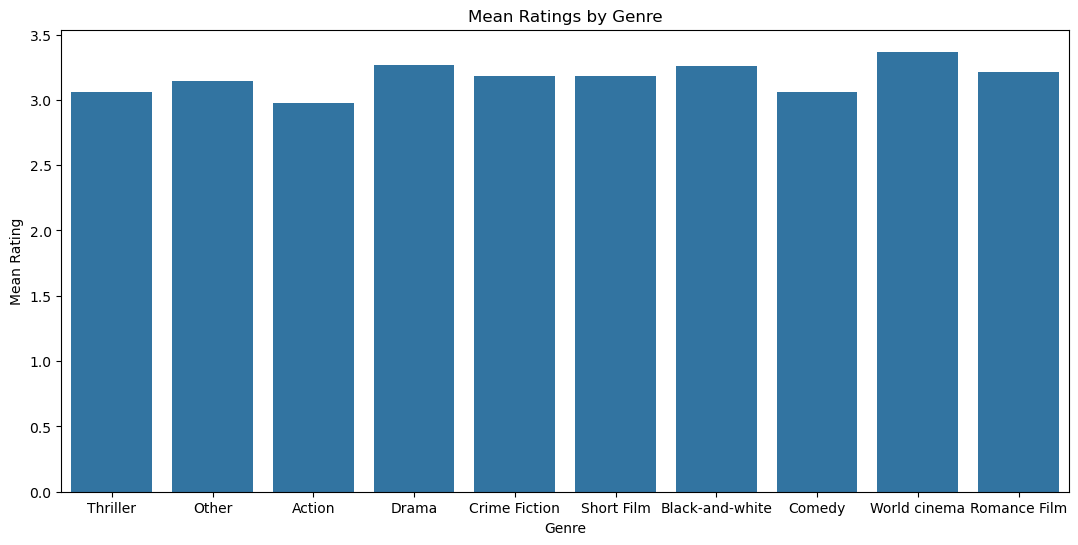

In [40]:
plt.figure(figsize=(13, 6))
sns.barplot(data=df_genres_expanded, x='Genres', y='mean_ratings', estimator='mean', errorbar=None)

# Set plot labels and title
plt.xlabel('Genre')
plt.ylabel('Mean Rating')
plt.title('Mean Ratings by Genre')
plt.show()

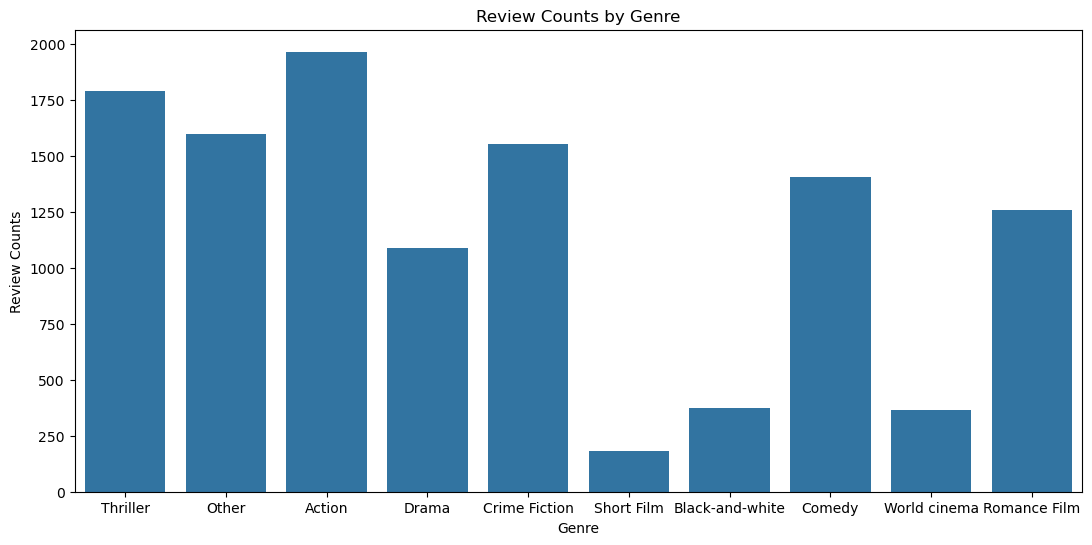

In [41]:
plt.figure(figsize=(13, 6))
sns.barplot(data=df_genres_expanded, x='Genres', y='count_ratings', estimator='mean', errorbar=None)

# Set plot labels and title
plt.xlabel('Genre')
plt.ylabel('Review Counts')
plt.title('Review Counts by Genre')
plt.show()

In [42]:
# df_final.to_csv('../data/processed/df_final.csv', index=False)